1. #3 (age) 
2. #4 (sex) 
3. #9 (cp) 
4. #10 (trestbps) 
5. #12 (chol) 
6. #16 (fbs) 
7. #19 (restecg) 
8. #32 (thalach) 
9. #38 (exang) 
10. #40 (oldpeak) 
11. #41 (slope) 
12. #44 (ca) 
13. #51 (thal) 
14. #58 (num) (the predicted attribute) 

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [28]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nyp-sit/data/master/heart_disease_dataset.csv'
#f = pd.read_csv('heart_disease_dataset.csv')
df = pd.read_csv(url)
print(df.head())

df.info()

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  num
0   63    1   1     145.0   233    1  ...      0      2.3      3   0     6    0
1   67    1   4     160.0   286    0  ...      1      1.5      2   3     3    1
2   67    1   4     120.0   229    0  ...      1      2.6      2   2     7    1
3   37    1   3     130.0   250    0  ...      0      3.5      3   0     3    0
4   41    0   2       NaN   204    0  ...      0      1.4      1   0     3    0

[5 rows x 14 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    301 non-null float64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 

In [4]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           2
dtype: int64

In [0]:
cp = pd.get_dummies(df['cp'], prefix='cp')
df.drop(['cp'], axis=1, inplace=True)

In [0]:
df = pd.concat([df, cp], axis=1)

In [0]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,cp_1,cp_2,cp_3,cp_4
0,63,1,145.0,233,1,2,150,0,2.3,3,0,6,0,1,0,0,0
1,67,1,160.0,286,0,2,108,1,1.5,2,3,3,1,0,0,0,1
2,67,1,120.0,229,0,2,129,1,2.6,2,2,7,1,0,0,0,1
3,37,1,130.0,250,0,0,187,0,3.5,3,0,3,0,0,0,1,0
4,41,0,NaN,204,0,2,172,0,1.4,1,0,3,0,0,1,0,0


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
age         242 non-null int64
sex         242 non-null int64
trestbps    240 non-null float64
chol        242 non-null int64
fbs         242 non-null int64
restecg     242 non-null int64
thalach     242 non-null int64
exang       242 non-null int64
oldpeak     242 non-null float64
slope       242 non-null int64
ca          242 non-null int64
thal        242 non-null int64
num         242 non-null int64
dtypes: float64(2), int64(11)
memory usage: 26.5 KB


In [8]:
# dealing with missing values
# train_set.dropna() 
# train_set.fillna() 

train_new = train_set.dropna()
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 132 to 102
Data columns (total 13 columns):
age         240 non-null int64
sex         240 non-null int64
trestbps    240 non-null float64
chol        240 non-null int64
fbs         240 non-null int64
restecg     240 non-null int64
thalach     240 non-null int64
exang       240 non-null int64
oldpeak     240 non-null float64
slope       240 non-null int64
ca          240 non-null int64
thal        240 non-null int64
num         240 non-null int64
dtypes: float64(2), int64(11)
memory usage: 26.2 KB


In [11]:
median_trestbps = train_set.trestbps.median()
train_set.trestbps.fillna(median_trestbps, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
age         242 non-null int64
sex         242 non-null int64
trestbps    242 non-null float64
chol        242 non-null int64
fbs         242 non-null int64
restecg     242 non-null int64
thalach     242 non-null int64
exang       242 non-null int64
oldpeak     242 non-null float64
slope       242 non-null int64
ca          242 non-null int64
thal        242 non-null int64
num         242 non-null int64
dtypes: float64(2), int64(11)
memory usage: 26.5 KB


In [13]:
test_set.trestbps.fillna(median_trestbps,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
X_train = train_set.drop(['num'], axis=1)
y_train = train_set['num']

In [0]:
X_test = test_set.drop(['num'], axis=1)
y_test =test_set['num']

In [0]:
from sklearn.linear_model import LogisticRegression


In [0]:
lr_clf = LogisticRegression(solver='lbfgs')

In [22]:
lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([0.75510204, 0.85714286, 0.72916667, 0.83333333, 0.77083333])

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lr_clf, X_train, y_train, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[117,  18],
       [ 33,  74]])

In [27]:
lr_clf.classes_

array([0, 1])

In [0]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.8260869565217391
0.7102803738317757


In [0]:
y_scores = cross_val_predict(lr_clf, X_train, y_train, cv=5, method='decision_function')

/Users/markk/anaconda/envs/tf2env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markk/anaconda/envs/tf2env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markk/anaconda/envs/tf2env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markk/anaconda/envs/tf2env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/markk/anaconda/envs/tf2env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: 

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [0]:
precisions >= 0.9

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [0]:
import numpy as np

np.argmax(precisions >= 0.9)

176

In [0]:
thresholds_90_precision = thresholds[np.argmax(precisions >= 0.9)]
print(thresholds_90_precision)

1.6527885684197574


In [0]:
y_train_pred_90 = (y_scores >= thresholds_90_precision)


In [0]:
y_train_pred_90.shape

(242,)

In [0]:
y_train.shape

(242,)

In [0]:
precision_score(y_train, y_train_pred_90)

0.9047619047619048

In [0]:
recall_score(y_train, y_train_pred_90)

0.5327102803738317

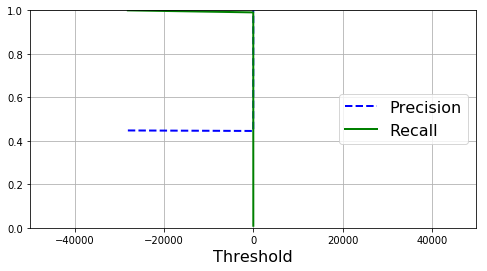

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline


    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


plt.show()